<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/clsuter_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis

In [1]:
# @title Import packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import time
import gc
import os
import glob

#from scipy.special import erf

In [2]:
# @title Paramters

k_power = 0
bl= 32
l = 7
lx, ly, lz = l,l,l
pixel = 2**9
z_pixel = pixel
g_sigma = 7

In [3]:
# @title Load

from google.colab import drive
drive.mount('/content/gdrive/')


folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/k_{k_power}_l_{bl}_s_{g_sigma}'
os.chdir(folder_path)
npy_files = glob.glob('*0.npy')
print(len(npy_files))

Mounted at /content/gdrive/
136


In [ ]:
# @title Density & mass analysis

l_list = range(33)

mass_mean_list=[]
mass_std_list=[]
density_mean_list= []
density_std_list= []
length_list= []

folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/k_{k_power}_l_{bl}_s_{g_sigma}'
os.chdir(folder_path)
npy_files = glob.glob('*0.npy')

for l in l_list:
    lengths = 2*l + 1

    lx,ly,lz = l,l,l

    density_list = []
    mass_list=[]
    for files in npy_files:

        st = time.time()

        sub_exprf = np.load(f'{files}')

        max_pt = np.argmax( sub_exprf )
        max_coord = np.unravel_index(max_pt, sub_exprf.shape)

        x,y,z = max_coord[0], max_coord[1], max_coord[2]

        x_min, x_max = max(x-lx,0), min(x+lx +1, pixel)
        y_min, y_max = max(y-ly,0), min(y+ly +1, pixel)
        z_min, z_max = max(z-lz,0), min(z+lz +1, z_pixel)

        max_sub_vol = sub_exprf[x_min:x_max, y_min:y_max, z_min:z_max]

        if max_sub_vol.shape == (lengths, lengths, lengths):
            mass = np.sum(max_sub_vol)
            density = mass/ (lengths**3)
            mass_list.append(mass)
            density_list.append(density)

    length_list.append( 2*l+1)
    mass_mean_list.append(  np.mean(mass_list) )
    mass_std_list.append(   np.std(mass_list) )
    density_mean_list.append(  np.mean(density_list) )
    density_std_list.append(   np.std(density_list) )

        #print(round(time.time()- st,2), f'{files}')

# Change of density & mass, Y[n] - Y[n-1]
diff_density = np.diff(density_mean_list)
diff_mass = np.diff(mass_mean_list )
# Change of length, Length[n] - Length[n-1] = 2
diff_length = np.diff(length_list)
# Dy/Dx
D_density = diff_density/diff_length
D_mass = diff_mass/diff_length
# The middle point between two data.
midpoints = (np.array(length_list)[:-1] + np.array(length_list)[1:]) / 2

Current Working Directory: /content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/density


<Figure size 640x480 with 0 Axes>

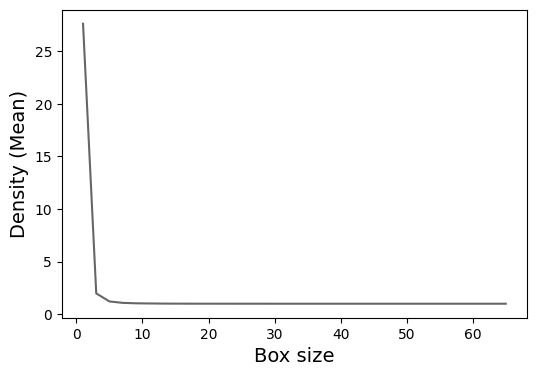

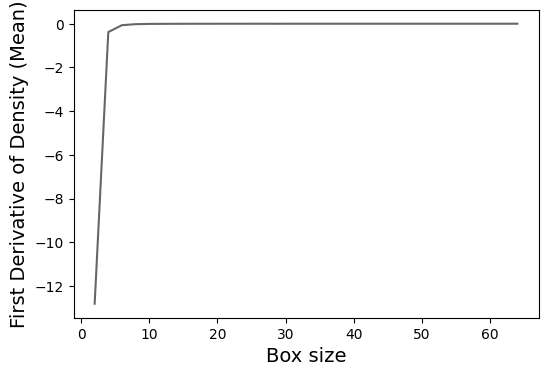

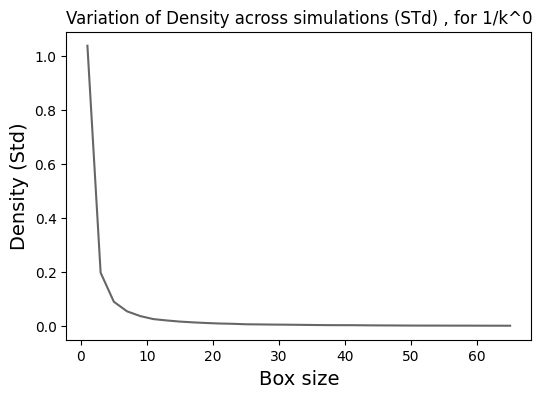

In [ ]:
# @title Plot dessity


folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/density'
os.chdir(folder_path)
print("Current Working Directory:", os.getcwd() )
plt.savefig(f'Density_Std_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)


########################################################################
########################################################################
########################################################################
########################################################################
# Plot density
plt.figure(figsize=(6,4))
plt.plot(length_list, density_mean_list, color= 'black', alpha = 0.6);

#plt.title(f'Density (Mean of all simulations), for 1/k^{k_power}')
plt.xlabel(f'Box size', fontsize =14)
plt.ylabel(f'Density (Mean)', fontsize =14)
plt.savefig(f'Density_Mean_k_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)
plt.show()

########################################################################
# Plot first derivative of the density
plt.figure(figsize=(6,4))
plt.plot(midpoints, D_density, color= 'black', alpha = 0.6);

#plt.title(f'First Derivative of Density (Mean of all simulations), for 1/k^{k_power}')
plt.xlabel(f'Box size', fontsize =14)
plt.ylabel(f'First Derivative of Density (Mean)', fontsize =14)
plt.savefig(f'First_Derivative_Density_Mean_k_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)
plt.show()

########################################################################
# Plot the standard deviation of density across different simulations
plt.figure(figsize=(6,4))
plt.plot(length_list, density_std_list, color= 'black', alpha = 0.6);

plt.title(f'Variation of Density across simulations (STd) , for 1/k^{k_power}')
plt.xlabel(f'Box size', fontsize =14)
plt.ylabel(f'Density (Std)', fontsize =14)
plt.savefig(f'Density_Variation_Density_Mean_k_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)
plt.show()

Current Working Directory: /content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/density


<Figure size 640x480 with 0 Axes>

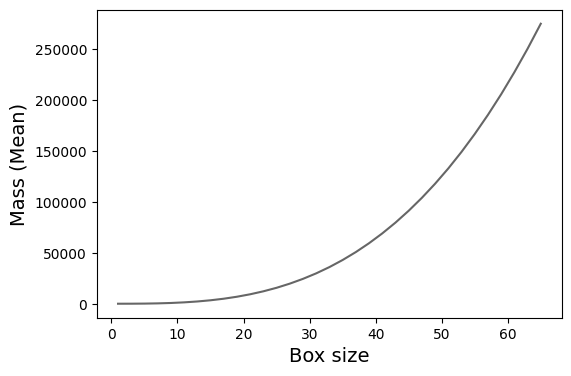

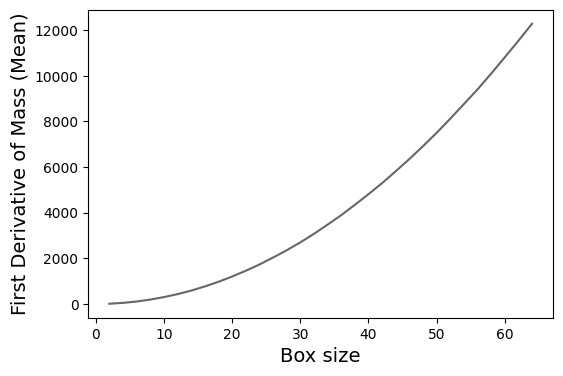

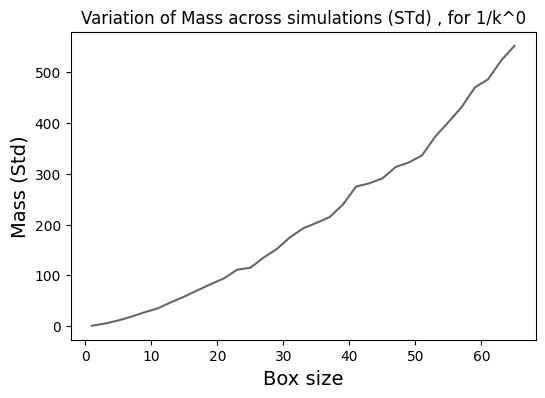

In [ ]:
# @ title Plot mass

folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/density'
os.chdir(folder_path)
print("Current Working Directory:", os.getcwd() )
plt.savefig(f'Density_Std_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)

########################################################################
# Plot mass
plt.figure(figsize=(6,4))
plt.plot(length_list, mass_mean_list, color= 'black', alpha = 0.6);

#plt.title(f'Density (Mean of all simulations), for 1/k^{k_power}')
plt.xlabel(f'Box size', fontsize =14)
plt.ylabel(f'Mass (Mean)', fontsize =14)
plt.savefig(f'Mass_Mean_k_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)
plt.show()

########################################################################
# Plot first derivative of the mass
plt.figure(figsize=(6,4))
plt.plot(midpoints, D_mass, color= 'black', alpha = 0.6);

#plt.title(f'First Derivative of mass (Mean of all simulations), for 1/k^{k_power}')
plt.xlabel(f'Box size', fontsize =14)
plt.ylabel(f'First Derivative of Mass (Mean)', fontsize =14)
plt.savefig(f'First_Derivative_Mass_Mean_k_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)
plt.show()

########################################################################
# Plot the standard deviation of mass across different simulations
plt.figure(figsize=(6,4))
plt.plot(length_list, mass_std_list, color= 'black', alpha = 0.6);

plt.title(f'Variation of Mass across simulations (STd) , for 1/k^{k_power}')
plt.xlabel(f'Box size', fontsize =14)
plt.ylabel(f'Mass (Std)', fontsize =14)
plt.savefig(f'Density_Variation_Mass_Mean_k_{k_power}_s_{g_sigma}', bbox_inches='tight', pad_inches=0)
plt.show()



## Analysis for all powers of k

In [ ]:
# @title Import packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import time
import gc
import os
import glob

#from scipy.special import erf

In [ ]:
# @title Functions

def density_analysis(max_length, npy_files, pixel):

    l_list = range(max_length+1)

    mass_mean_list=[]
    mass_std_list=[]
    density_mean_list= []
    density_std_list= []
    length_list= []

    for l in l_list:
        lengths = 2*l + 1

        lx,ly,lz = l,l,l

        density_list = []
        mass_list=[]
        for files in npy_files:

            st = time.time()

            sub_exprf = np.load(f'{files}')

            max_pt = np.argmax( sub_exprf )
            max_coord = np.unravel_index(max_pt, sub_exprf.shape)

            x,y,z = max_coord[0], max_coord[1], max_coord[2]

            x_min, x_max = max(x-lx,0), min(x+lx +1, pixel)
            y_min, y_max = max(y-ly,0), min(y+ly +1, pixel)
            z_min, z_max = max(z-lz,0), min(z+lz +1, pixel)

            max_sub_vol = sub_exprf[x_min:x_max, y_min:y_max, z_min:z_max]

            if max_sub_vol.shape == (lengths, lengths, lengths):
                mass = np.sum(max_sub_vol)
                density = mass/ (lengths**3)
                mass_list.append(mass)
                density_list.append(density)

        mass_mean_list.append(  np.mean(mass_list) )
        mass_std_list.append(   np.std(mass_list) )
        density_mean_list.append(  np.mean(density_list) )
        density_std_list.append(   np.std(density_list) )


    return mass_mean_list, mass_std_list, density_mean_list ,density_std_list

Completed for k=0
Completed for k=1
Completed for k=2
Completed for k=3
Current Working Directory: /content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/density


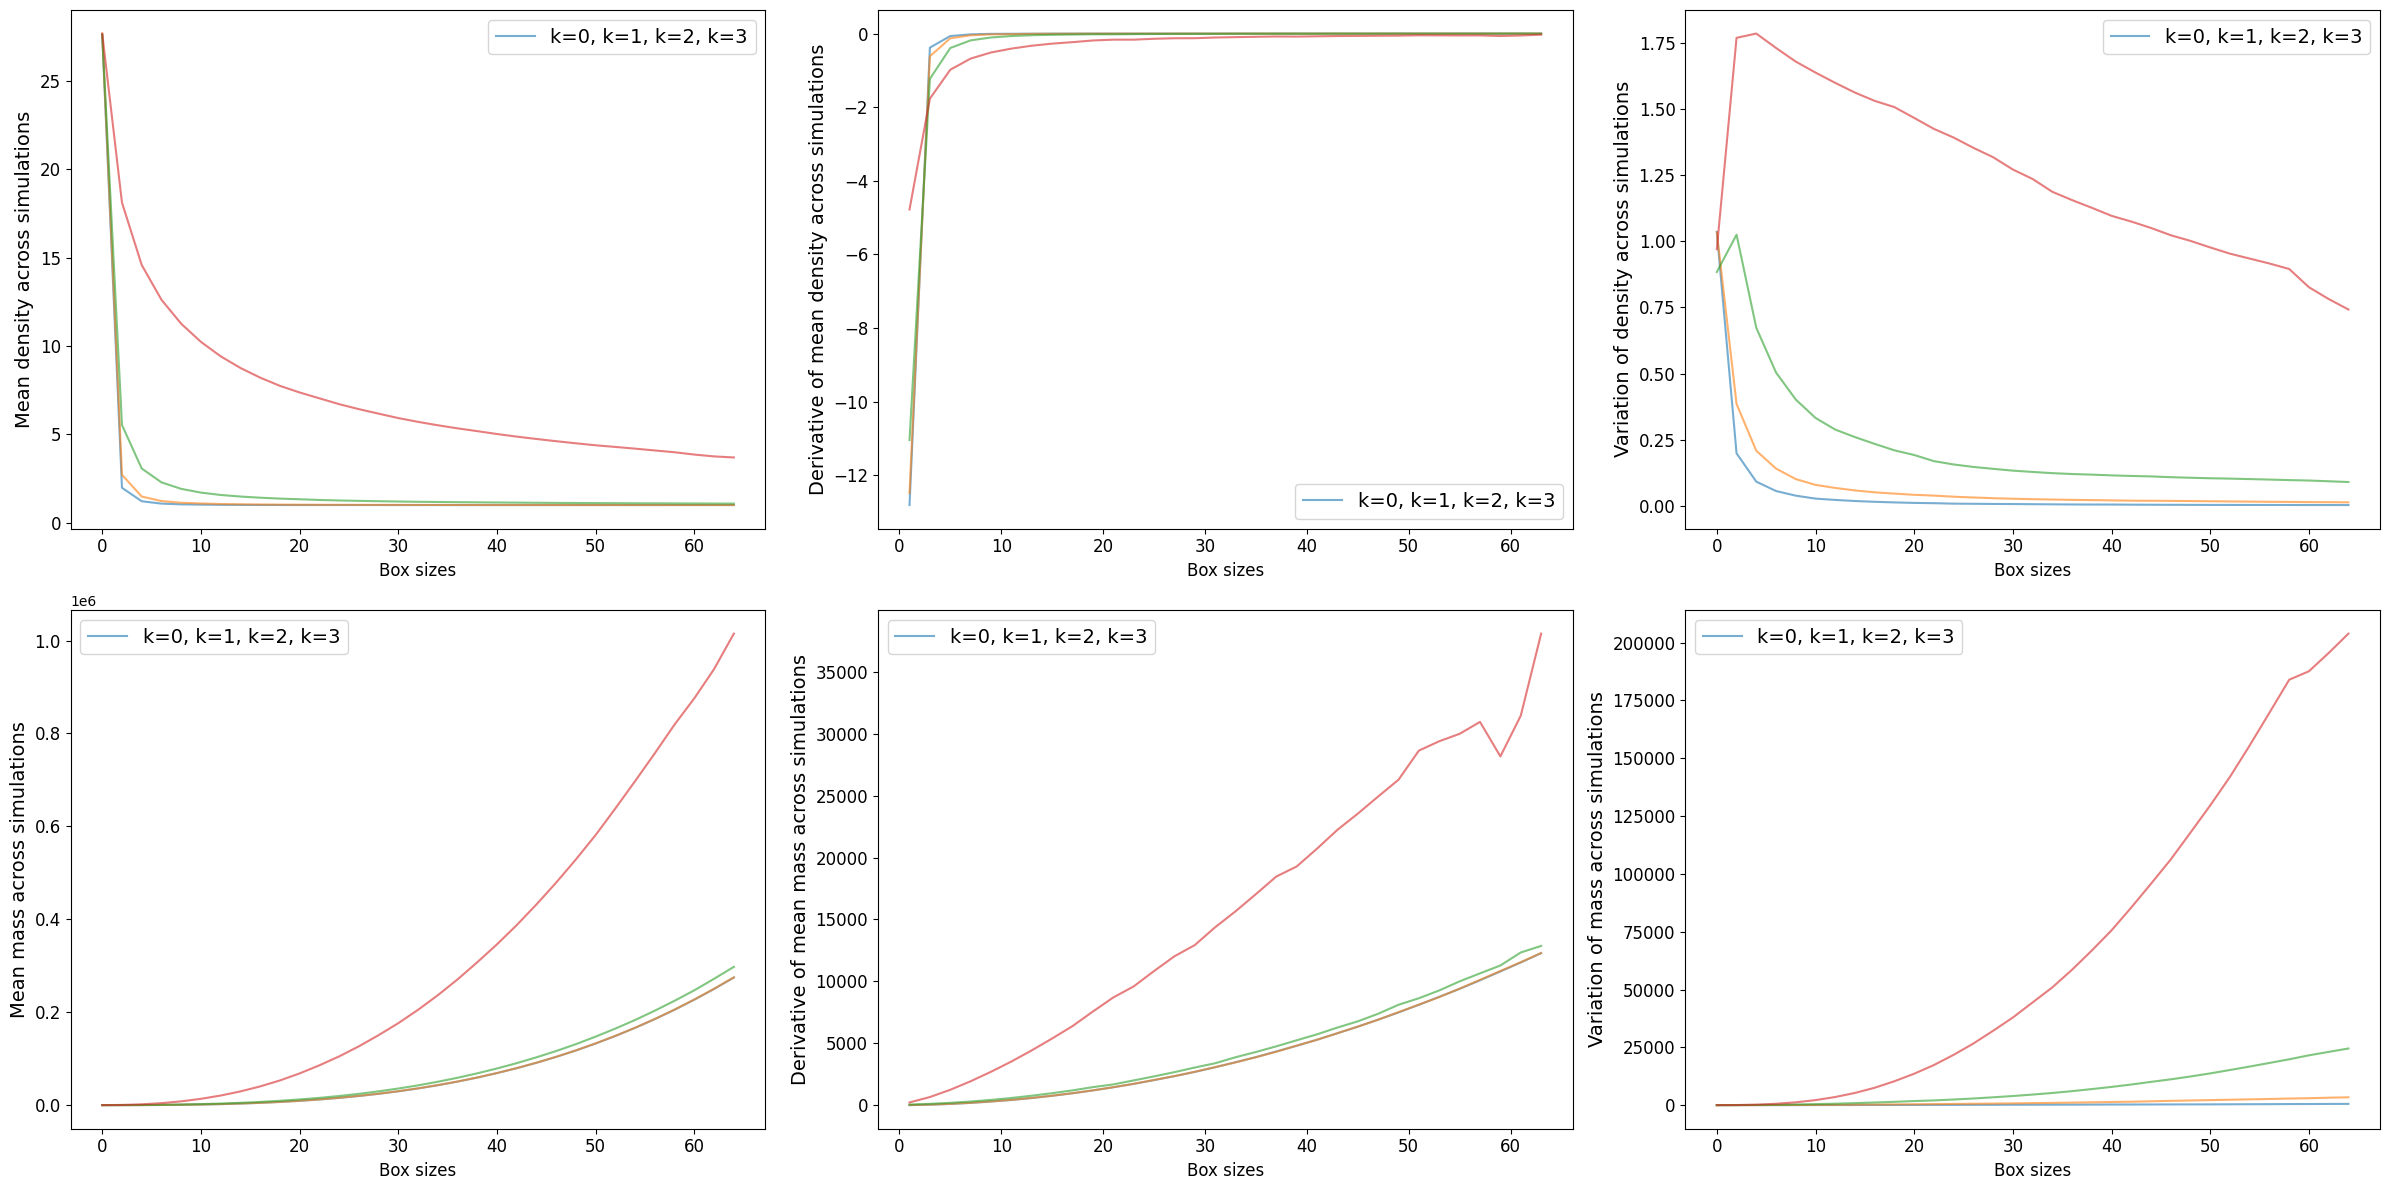

In [ ]:
# @title density and massa nalysis

max_length = 32 # => Box size = max_length*2 +1
pixel = 2**9
z_pixel = pixel
g_sigma = 7

fig, ((ax1, ax2, ax3), (bx1, bx2, bx3))  = plt.subplots(2,3,  figsize=(24, 12))

k_power_list = [0,1,2,3]
length_list = np.arange(0,2*max_length+2, 2)

for k_power in k_power_list:

    folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/k_{k_power}_l_{max_length}_s_{g_sigma}'
    os.chdir(folder_path)
    npy_files = glob.glob('*0.npy')

    # Function to return a list of mass and density
    mass_mean_list, mass_std_list, density_mean_list ,density_std_list  = density_analysis(max_length, npy_files, pixel)


    diff_density= np.diff(density_mean_list) # Change of density, Y[n] - Y[n-1]
    diff_mass   = np.diff(mass_mean_list ) # Change of mass, Y[n] - Y[n-1]
    diff_length = np.diff(length_list) # Change of length, Length[n] - Length[n-1] = 2
    D_density   = diff_density/diff_length # Dy/Dx
    D_mass      = diff_mass/diff_length  # Dy/Dx
    midpoints   = (np.array(length_list)[:-1] + np.array(length_list)[1:]) / 2     # The middle point between two data.

    alphas = 0.6

    ax1.plot(length_list, density_mean_list,  alpha = alphas);
    bx1.plot(length_list, mass_mean_list,  alpha = alphas);
    ax2.plot(midpoints, D_density,  alpha = alphas);
    bx2.plot(midpoints, D_mass,  alpha = alphas);
    ax3.plot(length_list, density_std_list,  alpha = alphas);
    bx3.plot(length_list, mass_std_list,  alpha = alphas);


    print(f'Completed for k={k_power}')


ax1.set_ylabel('Mean density across simulations', fontsize=14)
bx1.set_ylabel('Mean mass across simulations', fontsize=14)
ax2.set_ylabel('Derivative of mean density across simulations', fontsize=14)
bx2.set_ylabel('Derivative of mean mass across simulations', fontsize=14)
ax3.set_ylabel('Variation of density across simulations', fontsize=14)
bx3.set_ylabel('Variation of mass across simulations', fontsize=14)

for axs in [ax1,ax2,ax3,bx1,bx2,bx3]:
    axs.tick_params(axis='both', which='major', labelsize=12)
    axs.legend(['k=0', 'k=1', 'k=2', 'k=3'], fontsize=14)
    axs.set_xlabel('Box sizes', fontsize=12)

fig.tight_layout()


folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/density'
os.chdir(folder_path)
print("Current Working Directory:", os.getcwd() )


expand_factor = 1.175
shift_left = 0.4
shift_down = -0.3


extent1 = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent1 = extent1.expanded(expand_factor, expand_factor)
extent1 = extent1.translated(-shift_left, shift_down)
fig.savefig('density_mean_plot.png', bbox_inches=extent1)

extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent2 = extent2.expanded(expand_factor, expand_factor)
extent2 = extent2.translated(-shift_left, shift_down)
fig.savefig('density_derivative_plot.png', bbox_inches=extent2)

extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent3 = extent3.expanded(expand_factor, expand_factor)
extent3 = extent3.translated(-shift_left, shift_down)
fig.savefig('density_variation_plot.png', bbox_inches=extent3)

# Save second row
extent4 = bx1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent4 = extent4.expanded(expand_factor, expand_factor)
extent4 = extent4.translated(-shift_left, shift_down)
fig.savefig('mass_mean_plot.png', bbox_inches=extent4)

extent5 = bx2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent5 = extent5.expanded(expand_factor, expand_factor)
extent5 = extent5.translated(-shift_left, shift_down)
fig.savefig('mass_derivative_plot.png', bbox_inches=extent5)

extent6 = bx3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent6 = extent6.expanded(expand_factor, expand_factor)
extent6 = extent6.translated(-shift_left, shift_down)
fig.savefig('mass_variation_plot.png', bbox_inches=extent6)

#plt.show()

In [ ]:

expand_factor = 1.17
shift_left = 0.5
shift_down = -0.25


extent1 = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent1 = extent1.expanded(expand_factor, expand_factor)
extent1 = extent1.translated(-shift_left, shift_down)
fig.savefig('density_mean_plot.png', bbox_inches=extent1)

extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent2 = extent2.expanded(expand_factor, expand_factor)
extent2 = extent2.translated(-shift_left, shift_down)
fig.savefig('density_derivative_plot.png', bbox_inches=extent2)

extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent3 = extent3.expanded(expand_factor, expand_factor)
extent3 = extent3.translated(-shift_left, shift_down)
fig.savefig('density_variation_plot.png', bbox_inches=extent3)

# Save second row
extent4 = bx1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent4 = extent4.expanded(expand_factor, expand_factor)
extent4 = extent4.translated(-shift_left, shift_down)
fig.savefig('mass_mean_plot.png', bbox_inches=extent4)

extent5 = bx2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent5 = extent5.expanded(expand_factor, expand_factor)
extent5 = extent5.translated(-shift_left, shift_down)
fig.savefig('mass_derivative_plot.png', bbox_inches=extent5)

extent6 = bx3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent6 = extent6.expanded(expand_factor, expand_factor)
extent6 = extent6.translated(-shift_left, shift_down)
fig.savefig('mass_variation_plot.png', bbox_inches=extent6)
